In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm #support vector Machine


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
cols = ['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for c in cols:
    print('\n' + c)
    print(train_data[c].value_counts(dropna=False))


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
all_data = train_data.append(test_data)

/var/folders/18/l2pjq4_x1y3cmmlnwyd4x7_m0000gn/T/ipykernel_73952/3952726274.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = train_data.append(test_data)


# Preprocessing

Ideas & To Do's
- Add Title feat + add dummy's
- Handle missing values in Age based on Title & Class
- Handle missing values in Fare based on Class
- Handle missing values in Embarked based on most common value + add dummy's
- Drop Name, Title, Embarked & Cabin feat
- Transform categorical vars (Ticket & Sex)


In [9]:
# Creating new column name Title
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

In [10]:
all_data.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [11]:
# Aggregate titles
all_data["Title"] = all_data["Title"].replace('Mlle', 'Miss')
all_data["Title"] = all_data["Title"].replace(['Mme', 'Ms'], 'Mrs')
all_data["Title"] = all_data["Title"].replace(['Don','Jonkheer', 'Sir', 'Rev', 'Dr'],'Honor')
all_data["Title"] = all_data["Title"].replace(['Capt', 'Major', 'Col'], 'Millitary')
all_data["Title"] = all_data["Title"].replace(['Lady', 'Countess', 'Dona'], 'Honora')

all_data.Title.value_counts()

Mr           757
Miss         262
Mrs          200
Master        61
Honor         19
Millitary      7
Honora         3
Name: Title, dtype: int64

In [12]:
# Create dummy variables
titledummies = pd.get_dummies(all_data[['Title']], prefix_sep='_')
all_data = pd.concat([all_data, titledummies], axis=1) 

In [13]:
# Estimate missing Fare values
classes = np.unique(all_data.Pclass.values)
for clss in classes:
    fare_to_impute = all_data.groupby('Title')['Age'].median()[clss]
    all_data.loc[(all_data['Fare'].isnull()) & (all_data['Pclass'] == clss), 'Fare'] = fare_to_impute
print('Missing Fares Estimated')
all_data.describe()

Missing Fares Estimated


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Honor,Title_Honora,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.310532,0.014515,0.002292,0.046600,0.005348,0.200153,0.578304,0.152788
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.741745,0.119646,0.047836,0.210862,0.072959,0.400267,0.494019,0.359921
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Estimate missing Age values
titles = np.unique(all_data.Title.values)
for title in titles:
    age_to_impute = all_data.groupby('Title')['Age'].median()[title]
    all_data.loc[(all_data['Age'].isnull()) & (all_data['Title'] == title), 'Age'] = age_to_impute
print('Missing Ages Estimated')
all_data.describe()

Missing Ages Estimated


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Honor,Title_Honora,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.422972,0.498854,0.385027,33.310532,0.014515,0.002292,0.046600,0.005348,0.200153,0.578304,0.152788
std,378.020061,0.486592,0.837836,13.154266,1.041658,0.865560,51.741745,0.119646,0.047836,0.210862,0.072959,0.400267,0.494019,0.359921
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Estimate missing Embarked values
all_data["Embarked"] = all_data["Embarked"].fillna('S')

In [16]:
# Create dummy variables
embarked_dummies = pd.get_dummies(all_data[['Embarked']], prefix_sep='_')
all_data = pd.concat([all_data, embarked_dummies], axis=1)

In [17]:
columns_to_drop = ['Cabin', 'Name', 'Title', 'Embarked']

for c in columns_to_drop:
    all_data = all_data.drop([c], axis = 1)

In [18]:
for feat in ['Ticket', 'Sex']:
    le = preprocessing.LabelEncoder()
    le = le.fit(all_data[feat])
    all_data[feat] = le.transform(all_data[feat])
    
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Honor,Title_Honora,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,720,7.2500,0,0,0,0,0,1,0,0,0,1
1,2,1.0,1,0,38.0,1,0,816,71.2833,0,0,0,0,0,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,914,7.9250,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,0,35.0,1,0,65,53.1000,0,0,0,0,0,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,649,8.0500,0,0,0,0,0,1,0,0,0,1


In [19]:
train_data = all_data[:891]
test_data = all_data[891:]

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Honor,Title_Honora,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,720,7.2500,0,0,0,0,0,1,0,0,0,1
1,2,1.0,1,0,38.0,1,0,816,71.2833,0,0,0,0,0,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,914,7.9250,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,0,35.0,1,0,65,53.1000,0,0,0,0,0,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,649,8.0500,0,0,0,0,0,1,0,0,0,1


In [20]:
test_data = test_data.drop(['Survived'], axis = 1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Honor,Title_Honora,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,376,7.8292,0,0,0,0,0,1,0,0,1,0
1,893,3,0,47.0,1,0,582,7.0000,0,0,0,0,0,0,1,0,0,1
2,894,2,1,62.0,0,0,184,9.6875,0,0,0,0,0,1,0,0,1,0
3,895,3,1,27.0,0,0,366,8.6625,0,0,0,0,0,1,0,0,0,1
4,896,3,0,22.0,1,1,338,12.2875,0,0,0,0,0,0,1,0,0,1



Models to try
- logistic regression
- catboost

Visualize results

In [21]:
predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 11)

In [22]:
# Logistic Regression Classifier

model1 = LogisticRegression()
model1.fit(X_train,y_train)

/Users/marnix/opt/anaconda3/envs/titanic/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print('The training score for logistic regression is:',(model1.score(X_train,y_train)*100),'%')
print('Validation accuracy', accuracy_score(y_val, model1.predict(X_val)))

The training score for logistic regression is: 81.26801152737752 %
Validation accuracy 0.868020304568528


In [24]:
# Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=6)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=6)

In [25]:
print('The training score for Random Forests is:',(model2.score(X_train,y_train)*100),'%')
print('Validation accuracy', accuracy_score(y_val, model2.predict(X_val)))

The training score for Random Forests is: 96.25360230547551 %
Validation accuracy 0.8527918781725888


In [26]:
# Gradient Boosting
model3 = GradientBoostingClassifier(n_estimators=7,learning_rate=1.1)
model3.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.1, n_estimators=7)

In [27]:
print('The training score for Gradient Boosting is:',(model3.score(X_train,y_train)*100),'%')
print('Validation accuracy', accuracy_score(y_val, model3.predict(X_val)))

The training score for Gradient Boosting is: 88.76080691642652 %
Validation accuracy 0.868020304568528


In [28]:
model4 = CatBoostClassifier(iterations=10,
                           learning_rate=1.1)
model4.fit(X_train, y_train)

0:	learn: 0.4717101	total: 56.9ms	remaining: 512ms
1:	learn: 0.4308688	total: 57.8ms	remaining: 231ms
2:	learn: 0.4066799	total: 58.4ms	remaining: 136ms
3:	learn: 0.3905088	total: 59.1ms	remaining: 88.6ms
4:	learn: 0.3791518	total: 59.8ms	remaining: 59.8ms
5:	learn: 0.3762493	total: 60.7ms	remaining: 40.5ms
6:	learn: 0.3584344	total: 61.3ms	remaining: 26.3ms
7:	learn: 0.3531904	total: 62ms	remaining: 15.5ms
8:	learn: 0.3419583	total: 62.7ms	remaining: 6.97ms
9:	learn: 0.3366420	total: 63.5ms	remaining: 0us


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


In [29]:
print('The training score for CatBoost is:',(model4.score(X_train,y_train)*100),'%')
print('Validation accuracy', accuracy_score(y_val, model4.predict(X_val)))

The training score for CatBoost is: 87.31988472622479 %
Validation accuracy 0.8578680203045685


# Cross Validation

In [30]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
test_data = test_data.dropna()
classifiers=['Logistic Regression', 'Random Forest', 'GradientBoosting', 'CatBoost']
models=[LogisticRegression(),RandomForestClassifier(n_estimators=100),GradientBoostingClassifier(n_estimators=7,learning_rate=1.1),
        CatBoostClassifier(iterations=10, learning_rate=1.1)]
for i in models:
    model = i
    cv_result = cross_val_score(model,predictors,target, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/Users/marnix/opt/anaconda3/envs/titanic/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marnix/opt/anaconda3/envs/titanic/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

0:	learn: 0.4330073	total: 3.15ms	remaining: 28.3ms
1:	learn: 0.4019915	total: 3.88ms	remaining: 15.5ms
2:	learn: 0.3751029	total: 4.53ms	remaining: 10.6ms
3:	learn: 0.3728277	total: 4.92ms	remaining: 7.38ms
4:	learn: 0.3644611	total: 5.55ms	remaining: 5.55ms
5:	learn: 0.3549655	total: 6.12ms	remaining: 4.08ms
6:	learn: 0.3458087	total: 6.97ms	remaining: 2.99ms
7:	learn: 0.3427093	total: 7.54ms	remaining: 1.89ms
8:	learn: 0.3355943	total: 8.18ms	remaining: 908us
9:	learn: 0.3291469	total: 8.88ms	remaining: 0us
0:	learn: 0.4327438	total: 627us	remaining: 5.64ms
1:	learn: 0.3917810	total: 1.23ms	remaining: 4.91ms
2:	learn: 0.3762182	total: 1.72ms	remaining: 4ms
3:	learn: 0.3656373	total: 2.22ms	remaining: 3.33ms
4:	learn: 0.3574130	total: 2.79ms	remaining: 2.79ms
5:	learn: 0.3516546	total: 3.28ms	remaining: 2.19ms
6:	learn: 0.3444710	total: 3.78ms	remaining: 1.62ms
7:	learn: 0.3311504	total: 4.4ms	remaining: 1.1ms
8:	learn: 0.3221821	total: 4.89ms	remaining: 543us
9:	learn: 0.3171764	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease l

,CV Mean,Std
Logistic Regression,0.817091,0.036754
Random Forest,0.830574,0.043122
GradientBoosting,0.821561,0.031484
CatBoost,0.835019,0.023575


<Axes: >

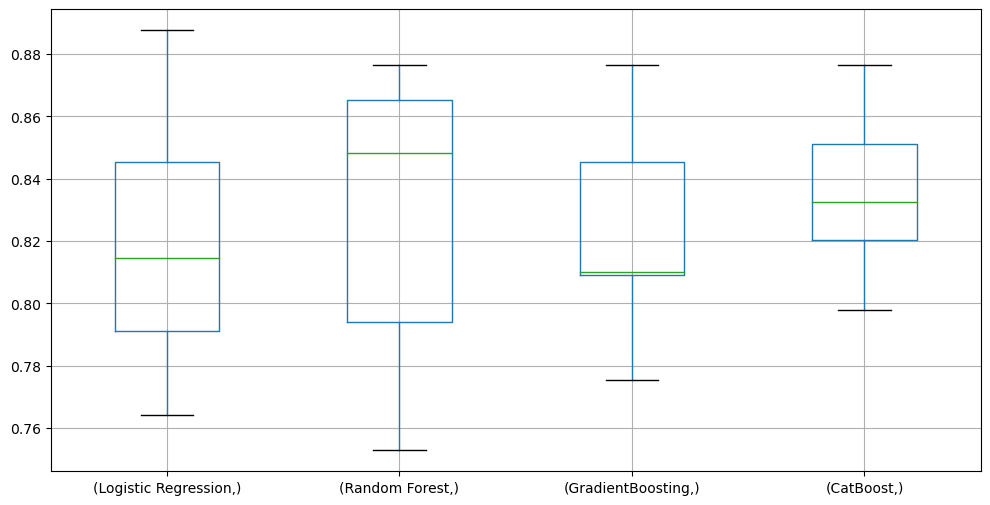

In [31]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

# Submission

In [ ]:
passenger_id = test_data.PassengerId
test_data = test_data.drop(['PassengerId'], axis=1)

In [35]:
prediction1 = model1.predict(test_data)
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': prediction1.astype(int) } )
filename = 'titanic_pred_' + 'LogReg' + '.csv'
test.to_csv( filename , index = False )


prediction2 = model2.predict(test_data)
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': prediction2.astype(int) } )
filename = 'titanic_pred_' + 'RandForest' + '.csv'
test.to_csv( filename , index = False )


prediction3 = model3.predict(test_data)
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': prediction3.astype(int) } )
filename = 'titanic_pred_' + 'GradBoost' + '.csv'
test.to_csv( filename , index = False )


prediction4 = model4.predict(test_data)
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': prediction4.astype(int) } )
filename = 'titanic_pred_' + 'CatBoost' + '.csv'
test.to_csv( filename , index = False )